# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
X, y = mnist['data'], mnist['target']

/Users/basakbuluttekin/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Now take a look at the shapes of the X and y matricies 

In [27]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [35]:
array_36000 = X.iloc[36000].values

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

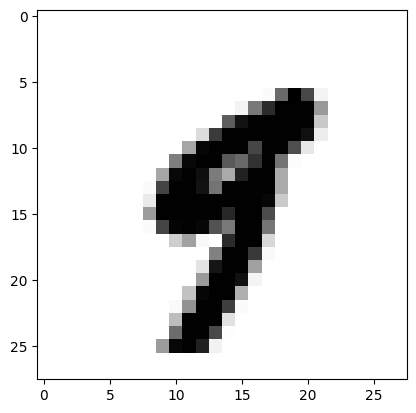

In [37]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(array_36000.reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

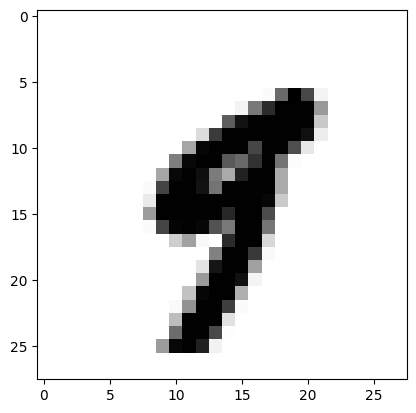

In [39]:
plt.imshow(array_36000.reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [41]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [42]:
from sklearn.model_selection import train_test_split
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5',1, 0)
print(X_train.shape, y5_train.shape, X_test.shape, y5_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LogisticRegression()
model.fit(X_train, y5_train)

/Users/basakbuluttekin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [45]:
print(model.predict(array_36000.reshape(1, -1)))

[0]


/Users/basakbuluttekin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
y_pred =model.predict(X_test)

In [46]:
# # yes it predicted corr"ectly because the number was 9.

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [47]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [48]:
never_5_clf.fit(X_train, y5_train)
never5_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [54]:
print(confusion_matrix(y5_test, y_pred))
print("Precision", precision_score(y5_test, y_pred))
print("Recall", recall_score(y5_test, y_pred))
print("F-Score", f1_score(y5_test, y_pred))

[[9034   74]
 [ 147  745]]
Precision 0.9096459096459096
Recall 0.8352017937219731
F-Score 0.8708357685563999


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

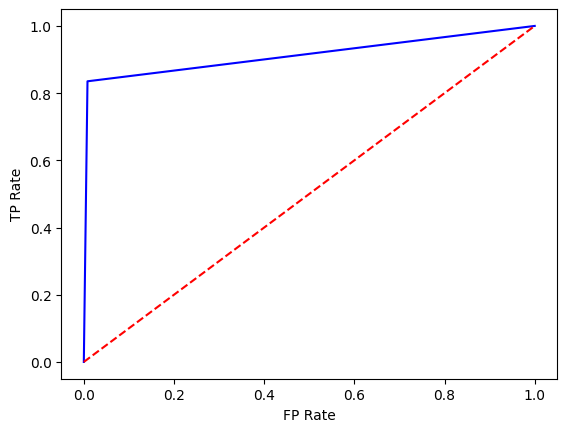

In [58]:
fpr, tpr, threshold = roc_curve(y5_test, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [65]:
roc_never5 = roc_auc_score(y5_test, never5_pred)
roc_base = roc_auc_score(y5_test,y_pred)
print(roc_never5, roc_base)

0.5 0.9135385341029717


### What does this metric tell you? Which classifier works better with this metric in mind?

In [66]:
# # The first classifier is working better than the second one.